# Algorithmic Fairness, Accountability, and Ethics, Spring 2023
# Exercise 2

The first three parts require no programming.
The final part requires programming and will be reused for Mandatory Assignment 1.

## Task 1 (basics)

Take a look at the following set of individuals:

![](001.png)

As in the lecture, individuals that have the target (T = 1) are drawn in blue, others (T = 0) are drawn in red. G = 0 refers to the triangle group, G = 1 refers to the circle group. Different to the lecture material, the visual split-up happens by selection status, not by target. 

- Compute the following probabilities: 
  - $\Pr(G = 1)$ 
  - $\Pr(G = 0)$
  - $\Pr(S = 1 \mid G = 1)$
  - $\Pr(S = 1 \mid G = 0)$
  - $\Pr(S = 1 \mid G = 1, T = 1)$
  - $\Pr(S = 1 \mid G = 0, T = 1)$
- Verify the following fairness criteria
  - $G \perp S$ (demographic parity)
  - $G \perp S | T$ (equalized odds)
  - $G \perp T | S$ (equalized outcome)
- In case one of the fairness conditions is not satisfied, change the example to satisfy it. What is the minimum number of changes necessary in each case? 
- Change the example such that all three fairness conditions hold at the same time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
data = [[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,1],[1,0,0],[1,0,0],[1,1,1],[1,1,1],[1,1,1]]

df = pd.DataFrame(data, columns=['G', 'T', 'S'])

def probs(df):
    n = df.shape[0]

    P_g1 = df[df.G==1].G.sum()/n
    P_g0 = 1-P_g1
    print(f'P(G==1): {P_g1:.2f}\nP(G==0): {P_g0:.2f}\n')


def statistical_parity(df):
    #statistical parity
    #P(S=1|G=1)
    P_sp1 = df[df.G==1].S.sum()/df[df.G==1].shape[0]

    #P(S=1|G=0)
    P_sp0 = df[df.G==0].S.sum()/df[df.G==0].shape[0]

    print(f'Statistical parity\nP(S=1|G=1): {P_sp1:.2f}\nP(S=1|G=0): {P_sp0:.2f}')
    print(f'Statistical parity {["achieved" if P_sp1==P_sp0 else "not achieved"][0]}\n')

def equalised_odds(df):
    #Equalised odds
    #P(S=1|G=1,T=1)
    temp = df[(df['G']==1) & (df['T']==1)]
    if temp.shape[0] == 0:
        P_eqg1=0
    else:
        P_eqg1 = temp.S.sum()/temp.shape[0]

    #P(S=1|G=0,T=1)
    temp = df[(df['G']==0) & (df['T']==1)]
    if temp.shape[0] == 0:
        P_eqg0=0
    else:
        P_eqg0 = temp.S.sum()/temp.shape[0]

    print(f'Equalised odds\nP(S=1|G=1,T=1): {P_eqg1:.2f}\nP(S=1|G=0,T=1): {P_eqg0:.2f}')
    
    #P(S=1|G=1,T=0)
    temp = df[(df['G']==1) & (df['T']==0)]
    if temp.shape[0] == 0:
        P_eqpg1=0
    else:
        P_eqpg1 = temp.S.sum()/temp.shape[0]

    #P(S=1|G=0,T=0)
    temp = df[(df['G']==0) & (df['T']==0)]
    if temp.shape[0] == 0:
        P_eqp0=0
    else:
        P_eqp0 = temp.S.sum()/temp.shape[0]

    print(f'P(S=1|G=1,T=0): {P_eqpg1:.2f}\nP(S=1|G=0,T=0): {P_eqp0:.2f}')

    print(f'Equalised odds {["achieved" if (P_eqg1==P_eqg0)&(P_eqpg1==P_eqp0) else "not achieved"][0]}\n')

def equalised_outcomes(df):
    #Equalised outcomes
    #P(T=1|G=1,S=1)
    temp = df[(df['G']==1) & (df['S']==1)]
    if temp.shape[0] == 0:
        P_out1=0
    else:
        P_out1 = temp['T'].sum()/temp.shape[0]

    #P(T=1|G=0,S=1)
    temp = df[(df['G']==0) & (df['S']==1)]
    if temp.shape[0] == 0:
        P_out0=0
    else:
        P_out0 = temp['T'].sum()/temp.shape[0]

    print(f'Equalised outcomes\nP(T=1|G=1,S=1): {P_out1:.2f}\nP(T=1|G=0,S=1): {P_out0:.2f}')

    #P(T=1|G=1,S=0)
    temp = df[(df['G']==1) & (df['S']==0)]
    if temp.shape[0] == 0:
        P_eout1=0
    else:
        P_eout1 = temp['T'].sum()/temp.shape[0]

    #P(T=1|G=0,S=0)
    temp = df[(df['G']==0) & (df['S']==0)]
    if temp.shape[0] == 0:
        P_eout0=0
    else:
        P_eout0 = temp['T'].sum()/temp.shape[0]

    print(f'P(T=1|G=1,S=0): {P_eout1:.2f}\nP(T=1|G=0,S=0): {P_eout0:.2f}')

    print(f'Equalised odds {["achieved" if (P_out1==P_out0)&(P_eout1==P_eout0) else "not achieved"][0]}\n')

probs(df)

statistical_parity(df)

equalised_odds(df)

equalised_outcomes(df)

P(G==1): 0.60
P(G==0): 0.40

Statistical parity
P(S=1|G=1): 0.67
P(S=1|G=0): 0.50
Statistical parity not achieved

Equalised odds
P(S=1|G=1,T=1): 1.00
P(S=1|G=0,T=1): 0.50
P(S=1|G=1,T=0): 0.33
P(S=1|G=0,T=0): 0.50
Equalised odds not achieved

Equalised outcomes
P(T=1|G=1,S=1): 0.75
P(T=1|G=0,S=1): 0.50
P(T=1|G=1,S=0): 0.00
P(T=1|G=0,S=0): 0.50
Equalised odds not achieved



In [3]:
df.S = 1 #select everyone! #Maybe this isn't a good solution?
# You could (should?) try some other values for S, and see if you can come up with a better solution

probs(df)

statistical_parity(df)

equalised_odds(df)

equalised_outcomes(df)

P(G==1): 0.60
P(G==0): 0.40

Statistical parity
P(S=1|G=1): 1.00
P(S=1|G=0): 1.00
Statistical parity achieved

Equalised odds
P(S=1|G=1,T=1): 1.00
P(S=1|G=0,T=1): 1.00
P(S=1|G=1,T=0): 1.00
P(S=1|G=0,T=0): 1.00
Equalised odds achieved

Equalised outcomes
P(T=1|G=1,S=1): 0.50
P(T=1|G=0,S=1): 0.50
P(T=1|G=1,S=0): 0.00
P(T=1|G=0,S=0): 0.00
Equalised odds achieved



## Task 2 (Other fairness criteria)

Consider the following fairness criteria: $G \perp T$ and $S \perp T$. 

- Find an intuitive explanation of these criteria, respectively. How would you call them?
- Formally write out how you verify the conditions in the case that $G$, $S$, and $T$ are binary.
- Can all criteria $G \perp S$ (demographic parity), $G \perp T$, and $S \perp T$ hold at the same time? If yes, give an example. If no, reason for the impossibility.

- demographic -> selection is independent of group, so knowing what group someone belongs to doesn't influence the chance of being selected
- equalised odds -> selection is independent of group, after controlling for target
- equalised outcomes -> target is independent of group, after controlling for selection

Not possible at the same time, unless S is independent of both G and T .. ie random. Probably not very useful, but maybe??

## Task 3 (Fairness/Utility-Tradeoff)

**Remark:** You might find it easier to solve this task by writing some code.

Look at the following two picture that presents group and target as usual, but instead of seeing the outcome of the selection, we just see the score. (You can think about it as the grade point average achieved in school.)

![](002.png)

We discuss a classifier that selects all individuals above a certain (maybe group-specific) threshold.

1) Sketch the ROC curve for a threshold based classifier (or actually plot it).
2) Let us say that we are in a situation where a false positive costs us 150 DKK, a true positive gives us 100 DKK.
    - If we want to maximize the profit using a single threshold, which one would it be?
    - If we want to achieve statistical parity by choosing individual threshold values, which thresholds can we choose? Which one provides the best utility, i.e., the largest profit? 
    - At which individual thresholds do you achieve equalized odds in this setting? Which setting achieves the best utility?

In [4]:
# Solutions based on those created by Anders Weile Larson 2024

# Define group, target, and score for each shape
#triangles=0,circles=1
group  = [0,   0,   0,   0,   0,   0,    1,   1,   1,   1,   1,   1] 
#blue = 1,red=0
target = [1,   0,   0,   1,   0,   1,    1,   1,   1,   0,   0,   0]
#score
score  = [9.7, 9.0, 9.5, 7.6, 9.1, 10.1, 6.8, 8.8, 6.7, 6.6, 6.4, 7.5]

df = pd.DataFrame({'G': group, 'T': target, 'Score': score})
df.sort_values(by='Score', ascending=True, inplace=True)

# Divide data into the two groups
idx_group_1 = group.index(1)
group_0 = group[:idx_group_1]
group_1 = group[idx_group_1:]
target_0 = target[:idx_group_1]
target_1 = target[idx_group_1:]
score_0 = score[:idx_group_1]
score_1 = score[idx_group_1:]

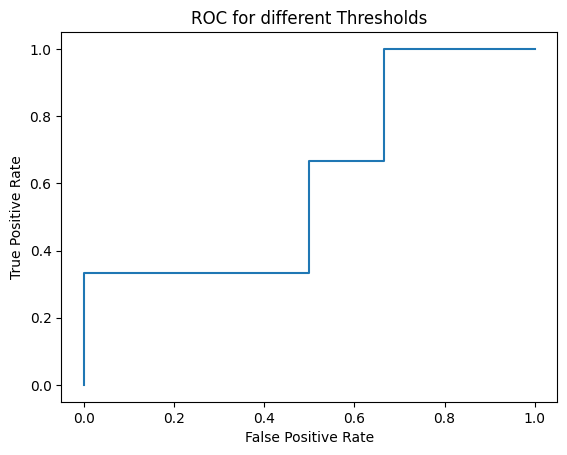

In [5]:
# Compute ROC curve 
#false positive rate, true positive rate, threshold
fpr, tpr, thr = roc_curve(target, score, drop_intermediate=False)

# Plot it
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.set_title("ROC for different Thresholds")
ax.set_ylabel("True Positive Rate")
ax.set_xlabel("False Positive Rate");

In [6]:
#Print threshold, tpr, fpr as calculated from sklearns roc_curve

rocs = [(float(x[0]), float(x[1]), float(x[2])) for x in zip(thr, tpr, fpr)]

rocs.sort(key=lambda x: x[0])

rocs

[(6.4, 1.0, 1.0),
 (6.6, 1.0, 0.8333333333333334),
 (6.7, 1.0, 0.6666666666666666),
 (6.8, 0.8333333333333334, 0.6666666666666666),
 (7.5, 0.6666666666666666, 0.6666666666666666),
 (7.6, 0.6666666666666666, 0.5),
 (8.8, 0.5, 0.5),
 (9.0, 0.3333333333333333, 0.5),
 (9.1, 0.3333333333333333, 0.3333333333333333),
 (9.5, 0.3333333333333333, 0.16666666666666666),
 (9.7, 0.3333333333333333, 0.0),
 (10.1, 0.16666666666666666, 0.0),
 (inf, 0.0, 0.0)]

In [7]:
#Calculate manually to check. Note tpr is not the same as the number of true positives.
 
def rates(df, threshold):
    df['S'] = df['Score'] >= threshold
    TP = df[df.S==1]['T'].sum()
    FP = df['S'].sum() - TP
    TN = df[df['T']==0].shape[0] - FP
    FN = df[df['T']==1].shape[0] - TP
    tpr = TP/(TP+FN)
    fpr = FP/(FP+TN)
    
    return float(tpr), float(fpr)

for threshold in df.Score:
    TPR, FPR = rates(df, threshold)
    print(f'Threshold: {threshold:.1f}, TPR: {TPR:.2f}, FPR: {FPR:.2f}')

Threshold: 6.4, TPR: 1.00, FPR: 1.00
Threshold: 6.6, TPR: 1.00, FPR: 0.83
Threshold: 6.7, TPR: 1.00, FPR: 0.67
Threshold: 6.8, TPR: 0.83, FPR: 0.67
Threshold: 7.5, TPR: 0.67, FPR: 0.67
Threshold: 7.6, TPR: 0.67, FPR: 0.50
Threshold: 8.8, TPR: 0.50, FPR: 0.50
Threshold: 9.0, TPR: 0.33, FPR: 0.50
Threshold: 9.1, TPR: 0.33, FPR: 0.33
Threshold: 9.5, TPR: 0.33, FPR: 0.17
Threshold: 9.7, TPR: 0.33, FPR: 0.00
Threshold: 10.1, TPR: 0.17, FPR: 0.00


### Let's make some money

In [8]:
# Compute n_positives (we'll need this later)
n_positives = sum(target)

# Find the global threshold which earns us the most money
best_index = 0
best_threshold = 0
money_list = []
most_money = 0
for i, threshold in enumerate(thr):
    tp = tpr[i] * n_positives
    fp = fpr[i] * n_positives
    money = (tp * 100 - fp * 150)
    money_list.append(money)
    if money > most_money:
        best_index = i
        most_money = money
        best_threshold = threshold

print(f'Best index: {best_index}, Best threshold: {best_threshold}, Most money: {most_money}', sep='\n')

df['S'] = 0

df.loc[df['Score'] >= best_threshold, 'S'] = 1
df

Best index: 2, Best threshold: 9.7, Most money: 200.0


,G,T,Score,S
10,1,0,6.4,0
9,1,0,6.6,0
8,1,1,6.7,0
6,1,1,6.8,0
11,1,0,7.5,0
3,0,1,7.6,0
7,1,1,8.8,0
1,0,0,9.0,0
4,0,0,9.1,0
2,0,0,9.5,0


### Let's make some money while maintaining statistical parity

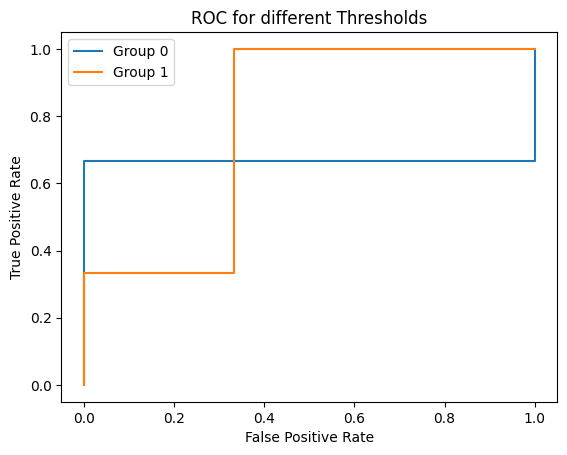

In [9]:
# Compute seperate ROC curves for the two groups
fpr_0, tpr_0, thr_0 = roc_curve(target_0, score_0, drop_intermediate=False)
fpr_1, tpr_1, thr_1 = roc_curve(target_1, score_1, drop_intermediate=False)

# Plot them
fig, ax = plt.subplots()

ax.plot(fpr_0, tpr_0, label='Group 0')
ax.plot(fpr_1, tpr_1, label='Group 1')
ax.set_title("ROC for different Thresholds")
ax.set_ylabel("True Positive Rate")
ax.set_xlabel("False Positive Rate")
plt.legend()
plt.show()

In [10]:
# Make money
n_positives_0 = sum(target_0)
n_positives_1 = sum(target_1)

best_index = 0
best_threshold_0 = 0
best_threshold_1 = 0
most_money = 0

for i in range(6):
    threshold_0 = thr_0[i]
    threshold_1 = thr_1[i]
    tp_0 = tpr_0[i] * n_positives_0
    fp_0 = fpr_0[i] * n_positives_0
    tp_1 = tpr_1[i] * n_positives_1
    fp_1 = fpr_1[i] * n_positives_1
    money = (tp_0 * 100 - fp_0 * 150) + (tp_1 * 100 - fp_1 * 150)
    if money > most_money:
        best_index = i
        most_money = money
        best_threshold_0 = threshold_0
        best_threshold_1 = threshold_1


print(f'Best index: {best_index}\nBest threshold group 0: {best_threshold_0}\nBest threshold group 1: {best_threshold_1}\nMost money with statistical parity: {most_money}')

Best index: 1
Best threshold group 0: 10.1
Best threshold group 1: 8.8
Most money with statistical parity: 200.0


In [11]:
df.S = 0

idx = df[df['G']==0].index
df.loc[idx, 'S'] = df.Score.apply(lambda x: 1 if x >= best_threshold_0 else 0)

idx = df[df['G']==1].index
df.loc[idx, 'S'] = df.Score.apply(lambda x: 1 if x >= best_threshold_1 else 0)

statistical_parity(df)

df

Statistical parity
P(S=1|G=1): 0.17
P(S=1|G=0): 0.17
Statistical parity achieved



,G,T,Score,S
10,1,0,6.4,0
9,1,0,6.6,0
8,1,1,6.7,0
6,1,1,6.8,0
11,1,0,7.5,0
3,0,1,7.6,0
7,1,1,8.8,1
1,0,0,9.0,0
4,0,0,9.1,0
2,0,0,9.5,0


### Let's make some money while maintaining equalized odds

In [12]:
money_array = np.zeros((len(thr_0), len(thr_1))) # Just to see how much money we could have made setting individual group thresholds without caring about fairness

best_index_0 = 0
best_index_1 = 0
best_threshold_0 = 0
best_threshold_1 = 0
most_money = 0
for i, thr_0_i in enumerate(thr_0):
    tpr_0_i = tpr_0[i]
    fpr_0_i = fpr_0[i]
    tp_0_i = tpr_0_i * n_positives_0
    fp_0_i = fpr_0_i * n_positives_0
    for j, thr_1_j in enumerate(thr_1):
        tpr_1_j = tpr_1[j]
        fpr_1_j = fpr_1[j]
        tp_1_j = tpr_1_j * n_positives_1
        fp_1_j = fpr_1_j * n_positives_1
        
        money = (tp_0_i * 100 - fp_0_i * 150) + (tp_1_j * 100 - fp_1_j * 150)
        money_array[i, j] = money
        
        if (money > most_money) & (tpr_0_i==tpr_1_j) & (fpr_0_i==fpr_1_j):
            best_index_0 = i
            best_index_1 = j
            most_money = money
            best_threshold_0 = thr_0_i
            best_threshold_1 = thr_1_j

print(f'Best index 0: {best_index_0}\nBest index 1: {best_index_1}\nBest threshold 0: {best_threshold_0}\nBest threshold 1: {best_threshold_1}\nMost money: {most_money}')

Best index 0: 1
Best index 1: 1
Best threshold 0: 10.1
Best threshold 1: 8.8
Most money: 200.0


In [13]:
df.S=0

temp = df[df.G==1]
df.loc[temp.index, 'S'] = df.Score.map(lambda x: 1 if x>=best_threshold_1 else 0)
temp = df[df.G==0]
df.loc[temp.index, 'S'] = df.Score.map(lambda x: 1 if x>=best_threshold_0 else 0)

equalised_odds(df)

Equalised odds
P(S=1|G=1,T=1): 0.33
P(S=1|G=0,T=1): 0.33
P(S=1|G=1,T=0): 0.00
P(S=1|G=0,T=0): 0.00
Equalised odds achieved



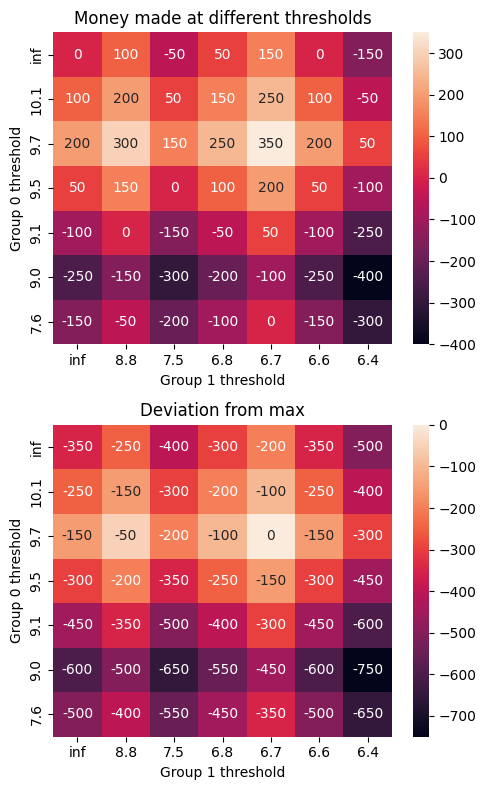

In [14]:
# Plot money array (no fairness constructs)
fig, ax = plt.subplots(2,1, figsize=(5,8))
sns.heatmap(money_array, annot=True, fmt='.0f', ax=ax[0])
ax[0].set_title("Money made at different thresholds")
ax[0].set_xlabel("Group 1 threshold")
ax[0].set_ylabel("Group 0 threshold")
ax[0].set_yticklabels(thr_0)
ax[0].set_xticklabels(thr_1)

sns.heatmap(money_array-money_array.max(), annot=True, fmt='.0f', ax=ax[1])
ax[1].set_title("Deviation from max")
ax[1].set_xlabel("Group 1 threshold")
ax[1].set_ylabel("Group 0 threshold")
ax[1].set_yticklabels(thr_0)
ax[1].set_xticklabels(thr_1)

plt.tight_layout()
plt.show()